In [1]:
import matplotlib.pyplot as plt
import pandas as pd
my_colors = ['#4f94cd',  '#48d1cc', '#54ff9f', '#eedc82',  '#ff7f50', '#f08080', '#dda0dd', '#a4a4a4']

In [5]:
df = pd.read_csv("Europe_Expenses.csv")

In [6]:
df.head()

,﻿Purchase,Date,Cost,Type,Notes,City
0,Oyster Card,3/19/2018,7.00,Transportation,NaN,London
1,Train,3/19/2018,11.62,Transportation,Gatwick to London Bridge,London
2,Padlock,3/19/2018,2.80,Misc,Not sure since I recorded this as a combinatio...,London
3,Hostel,3/19/2018,20.30,Housing,NaN,London
4,2 pint milk,3/20/2018,1.11,Groceries,NaN,London


In [26]:
byType = df.groupby('Type').sum().sort_values('Cost', ascending=True)
byType

,Cost
Type,
Misc,31.74
Alcohol,41.31
Toiletries,75.84
Groceries,218.71
Recreation,221.69
Transportation,676.18
Eating Out,763.50
Housing,1275.49


In [33]:
ax = byType.plot.bar(fontsize=12, color = my_colors[-1:], legend=False, edgecolor='None')

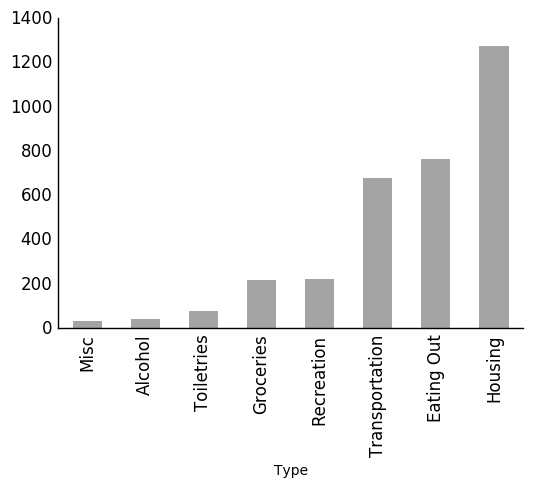

In [34]:
ax.spines['right'].set_color('None')
ax.spines['top'].set_color('None')
plt.tick_params(axis='x', which='both', top=False, bottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False)
plt.show()

In [10]:
byDate = df.groupby('Date').sum()
byDate.head()

,Cost
Date,
3/19/2018,41.72
3/20/2018,81.88
3/21/2018,79.23
3/22/2018,74.56
3/23/2018,105.69


In [11]:
ax = byDate.plot.line(rot=0, fontsize=6, legend=False, title="Money Spent", color="#0B8E36")

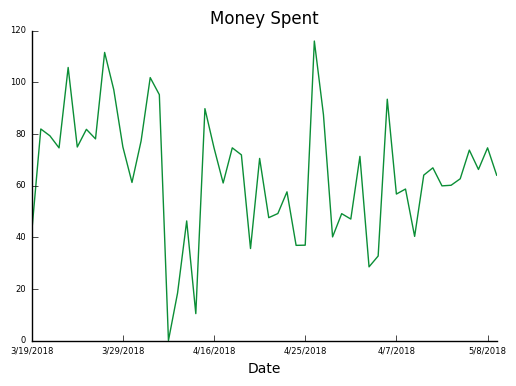

In [12]:
ax.spines['right'].set_color('None')
ax.spines['top'].set_color('None')
plt.tick_params(axis='x', which='both', top=False)
plt.tick_params(axis='y', which='both', right=False)
plt.show()

In [13]:
byCity = df.groupby('City').sum().sort_values('Cost', ascending=True)
byCity.head()

,Cost
City,
Budapest,88.03
Amsterdam,102.57
Utrecht,105.76
Annecy,126.31
Berlin,144.21


In [14]:
ax = byCity.plot.bar(fontsize=10, color ='#0B8E36', legend=False, title = 'Cost per city', edgecolor='None')
ax.spines['right'].set_color('None')
ax.spines['top'].set_color('None')
plt.tick_params(axis='x', which='both', top=False, bottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False)

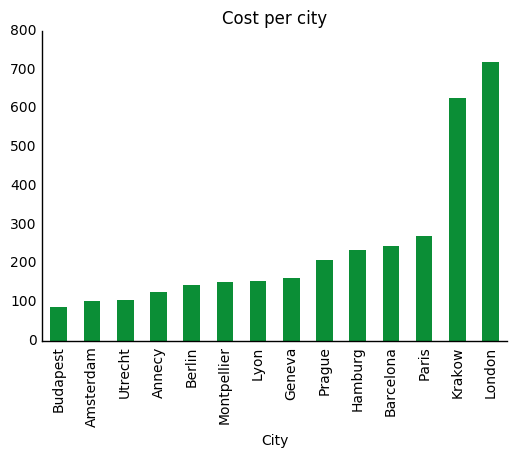

In [15]:
plt.show()

In [16]:
byCityDate = df.groupby(['City', 'Date']).sum()
byCityDate.head()

Cost
City      Date            
Amsterdam 4/10/2018  64.48
          4/15/2018  12.09
          4/9/2018   26.00
Annecy    3/29/2018  65.13
          3/30/2018  61.18

In [17]:
byCityDateAvg = byCityDate.groupby(level=[0]).mean().sort_values('Cost', ascending=True)
byCityDateAvg = byCityDateAvg.rename(index=str, columns={"Cost": "Avg Daily Cost"})
byCityDateAvg.head()

,Avg Daily Cost
City,
Utrecht,21.1520
Amsterdam,34.1900
Lyon,38.1625
Prague,41.8700
Budapest,44.0150


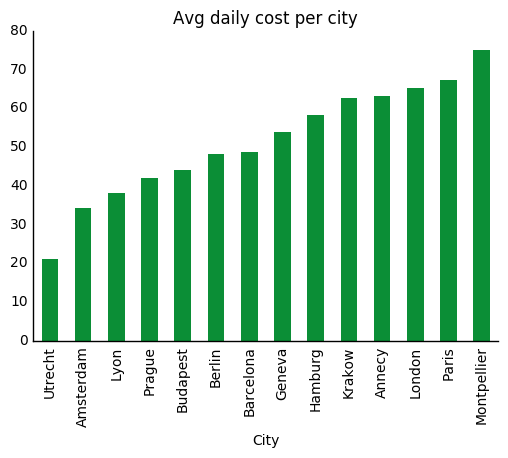

In [18]:
ax = byCityDateAvg.plot.bar(fontsize=10, color ='#0B8E36', legend=False, title = 'Avg daily cost per city', edgecolor = "none")
ax.spines['right'].set_color('None')
ax.spines['top'].set_color('None')
plt.tick_params(axis='x', which='both', top=False, bottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False)
plt.show()

In [19]:
df.head()

,﻿Purchase,Date,Cost,Type,Notes,City
0,Oyster Card,3/19/2018,7.00,Transportation,NaN,London
1,Train,3/19/2018,11.62,Transportation,Gatwick to London Bridge,London
2,Padlock,3/19/2018,2.80,Misc,Not sure since I recorded this as a combinatio...,London
3,Hostel,3/19/2018,20.30,Housing,NaN,London
4,2 pint milk,3/20/2018,1.11,Groceries,NaN,London


In [20]:
#df['Date'] = df['Date'].dt.date
df2 = df.groupby(['Date', 'Type'])['Cost'].sum().unstack('Type')
oldCols = df2.columns.tolist()
newCols = [oldCols[3], oldCols[1], oldCols[7], oldCols[5], oldCols[2], oldCols[6], oldCols[0], oldCols[4]]
df3 = df2[newCols]
ax = df3.plot.bar(fontsize=10, figsize=(20,10), stacked=True, title='Cost Breakdown per Day', color = my_colors, edgecolor="None")

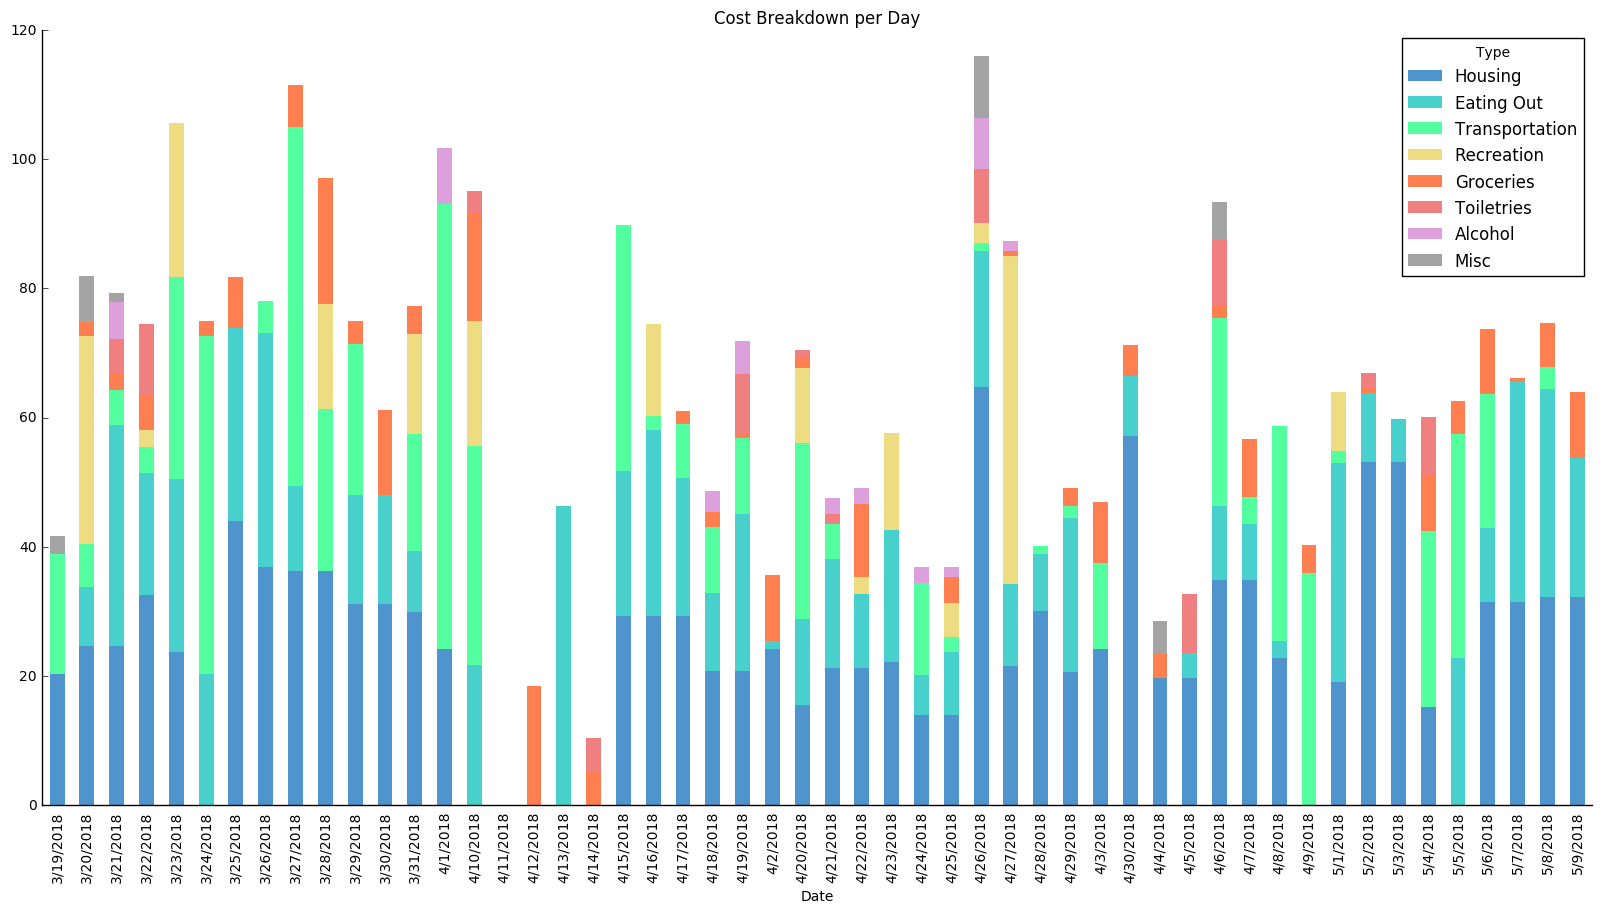

In [21]:
ax.spines['right'].set_color('None')
ax.spines['top'].set_color('None')
plt.tick_params(axis='x', which='both', top=False, bottom=False)
plt.tick_params(axis='y', which='both', right=False, left=True)
plt.show()

In [22]:
df4 = df.groupby(['City', 'Type'])['Cost'].sum().unstack('Type')
oldCols = df4.columns.tolist()
newCols = [oldCols[3], oldCols[1], oldCols[7], oldCols[5], oldCols[2], oldCols[6], oldCols[0], oldCols[4]]
df4 = df4[newCols]
ax = df4.plot.bar(fontsize=16, figsize=(20,10), stacked=True, title = 'Cost Breakdown per City', color=my_colors, edgecolor="None");

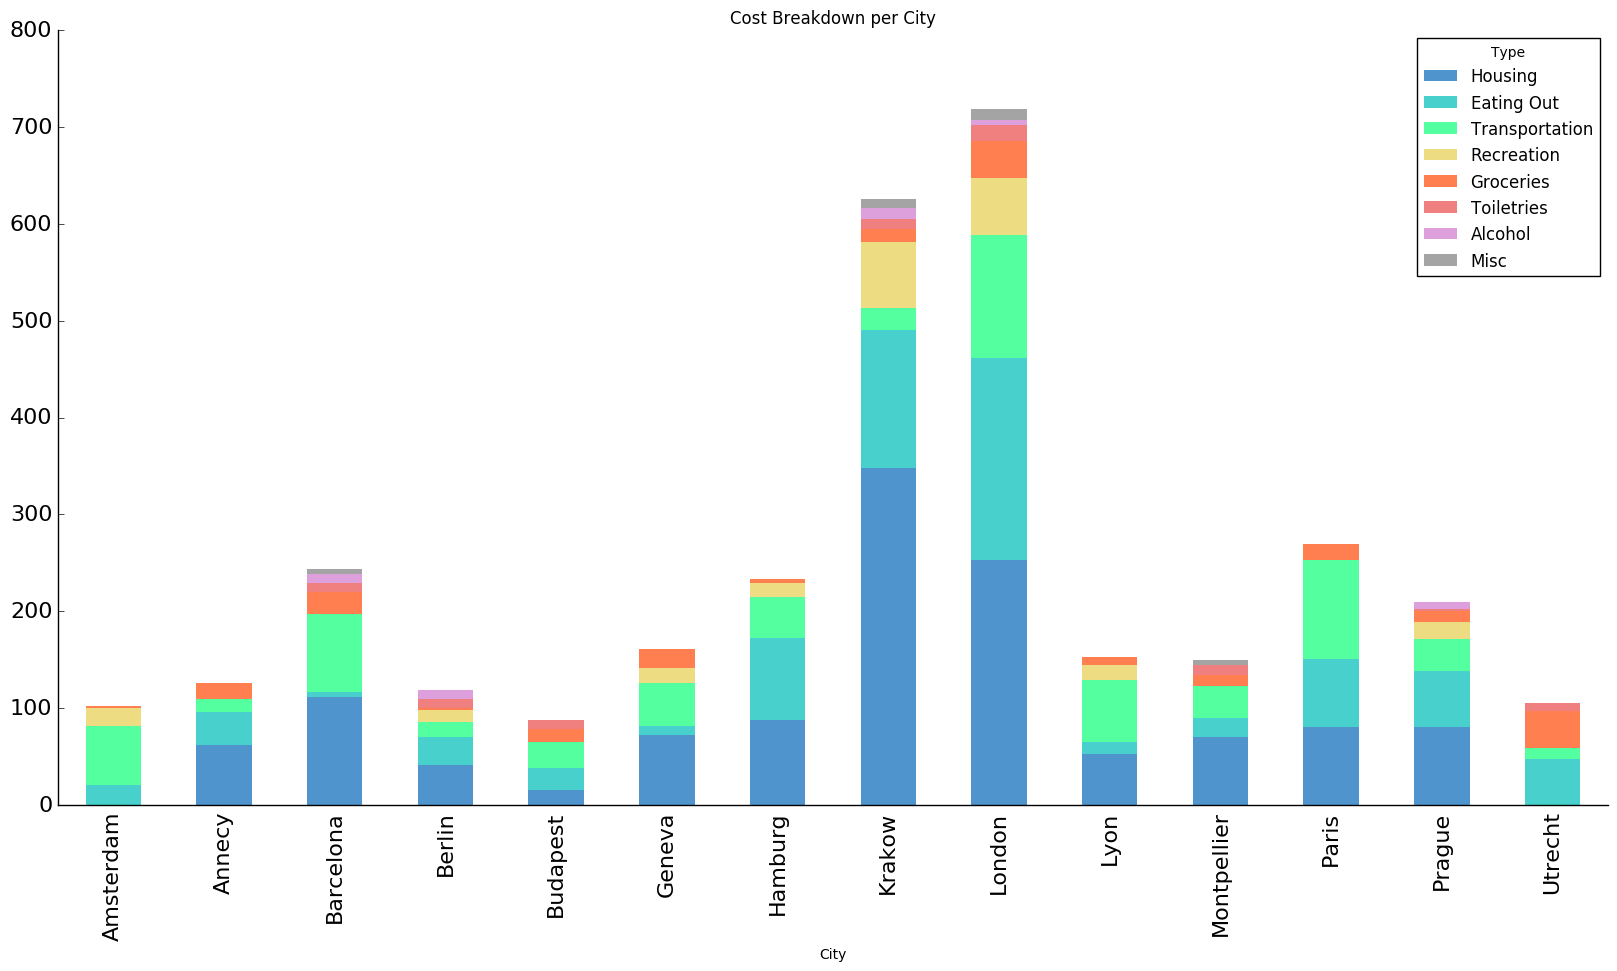

In [23]:
ax.spines['right'].set_color('None')
ax.spines['top'].set_color('None')
plt.tick_params(axis='x', which='both', top=False, bottom=False)
plt.tick_params(axis='y', which='both', right=False, left=True)
plt.show()